In [1]:
%matplotlib inline

import csv

import colour
import numpy as np
from colour.plotting import *

import matplotlib.colors as mc

In [2]:
def ingest(filename):
    points_list = []
    with open(filename, mode='r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            points_list.append(np.array(row, dtype=float))

    RGB_list = []
    for point in points_list:
    #     RGB_list.append(colour.models.eotf_inverse_sRGB(point / 255))
        RGB_list.append(point / 1)
        
    return RGB_list                                

In [3]:
points = ingest('Red_tile_RGB.csv')
points += ingest('Azur_tile_RGB.csv')
# points += ingest('Blue_brick_RGB.csv')
# points += ingest('Yellow_tile_RGB.csv')  # very similar to red
# points += ingest('LightYellow_brick_RGB.csv')  # cool yellow
# points += ingest('White_brick_RGB.csv')
# points += ingest('White_brick_RGB_2.csv')
# points += ingest('LightGreen_brick_RGB.csv') # bright green should be better

points = [x/256. for x in points]

/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "ALEXA Wide Gamut" RGB colourspace has been renamed to "ARRI Wide Gamut 3" for consistency with ARRI's new naming convention.
  warn(*args, **kwargs)
/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)
/Users/busko/.local/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)


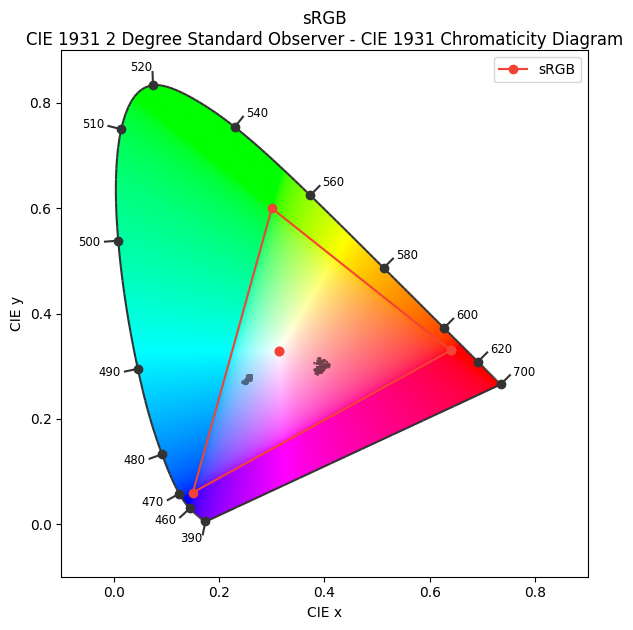

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [4]:
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(points, scatter_kwargs={"s": 1})